# 推測統計の基本
#### 推測統計
一部の Data から全体の統計的性質を推測する枠組み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

np.set_printoptions(precision=3)
pd.options.display.precision = 3

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])
display(scores[:10])

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

## 母集団と標本
推測統計では観測対象全体の統計的性質を、その観測対象の一部分のみを使って推測する。
- 母集団（population）: 推測したい観測対象全体のこと
- 標本（sample）: 推測に使う観測対象の一部分のこと
- 標本抽出（sampling）: 母集団から標本を取り出すこと
- 標本の大きさ（Sample size）: 標本の大きさ
- 標本統計量: 標本から計算される平均や分散、相関係数などの総称
- 母数: 母集団の平均や分散、相関係数などの総称
- 推定量（estimator）: ex). 標本平均で母平均を推測するときの母平均の標本平均のこと。
- 推定値（estimate）: 実際に標本の Data を用いて計算した結果

### 標本の抽出方法
#### 無作為抽出（random sampling）
 Random に標本を抽出する方法。無作為抽出は標本の抽出に偏りをなくす方法であって、その結果偏りのある Data が得られる可能性もある。
 しかし、そこでもう１回無作為抽出をやり直すと結果として作為的な抽出になってします。推測統計では無作為抽出の結果、偏りのある標本が得られる可能性も含めて推測を行なう。

#### 復元抽出（sampling with replacement）
複数回同じ標本を選ぶ抽出方法

#### 非復元抽出（sample without replacement)
同じ標本は一度しか選ばない方法

In [3]:
display(np.random.choice([1, 2, 3], 3))

array([3, 1, 2])

In [4]:
display(np.random.choice([1, 2, 3], 3, replace=False))

array([2, 3, 1])

乱数の Seed を導入する。
※ 乱数の Seed: 発生させる乱数の元となる数字。これを定めておくと毎回同じ乱数を得ることができる

In [5]:
np.random.seed(0)
display(np.random.choice([1, 2, 3], 3))

array([1, 2, 1])

Seed を設定することで毎回同じ乱数を得ることができ、Code の再現性を保つことができる。

In [6]:
np.random.seed(0)

# 標本平均
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [7]:
# 母平均
scores.mean()

69.53

無作為抽出は行なうたびに得られる標本平均も毎回異なる

In [8]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}回目の無作為抽出で得た標本平均', sample.mean())

1回目の無作為抽出で得た標本平均 72.45
2回目の無作為抽出で得た標本平均 63.7
3回目の無作為抽出で得た標本平均 66.05
4回目の無作為抽出で得た標本平均 71.7
5回目の無作為抽出で得た標本平均 74.15


標本平均は大体70点前後になっているが、それなりにばらつきもある様子。

## 確率 Model
不確定さを伴った現象は **確率（probability）** を使って考えることができる。
- **確率 Model(probability model)**: 確率を使って数学的に Model 化したもの

サイコロを使って確率 Model の基本を確認していく。

### 確率の基本

#### 確率変数（random variable）
結果を言い当てることはできないが、とりうる値とその値が出る確率がきまっているもの

#### 試行（trial）
確率変数（random variable）の結果を観測すること

#### 実現値（realization）
試行（trial）によって観測される値のこと

#### 事象（event）
試行（trial）の結果起こりうる出来事

#### 根元事象（elementary event）
それ以上細かく分解することのできない事象（event）のこと

#### 事象(event)が互いに排反
それぞれの事象が同時には起こりえないということ
「事象が互いに排反なら、それらのうち少なくとも１つが起こる事象は、各事象の確率の和に等しい」という性質がある

### 確率分布（probability distribution）
確率変数（random variable）がどのような振る舞いをするか表したもの。
全確率１が確率変数のとりうる値にどのように分布しているかを表しているものともいえる。
確率変数（random variable）をX, 確率分布（probability distribution）をA とすると
確率変数(random variable)Xは、確率分布(probability distribution)Aに従うという

いかさまサイコロの確率分布をもとめるための実験を行なっていく

In [9]:
# 確率変数に必要なとりうる値と、その値が出る確率を準備
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

確率の試行に `np.random.choice()` 関数を利用。
引数 `p` に `prob` を渡すことでそれぞれの確率を指定する

In [10]:
np.random.choice(dice, p=prob)

1

In [11]:
# 100回、試行してみる
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
display(sample)

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [12]:
# 度数分布表を作成する
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'度数': freq,
              '相対度数': freq / num_trial},
             index= pd.Index(np.arange(1, 7), name='出目'))

,度数,相対度数
出目,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


度数分布表によってそれぞれの出目の回数や割合がわかるようになった

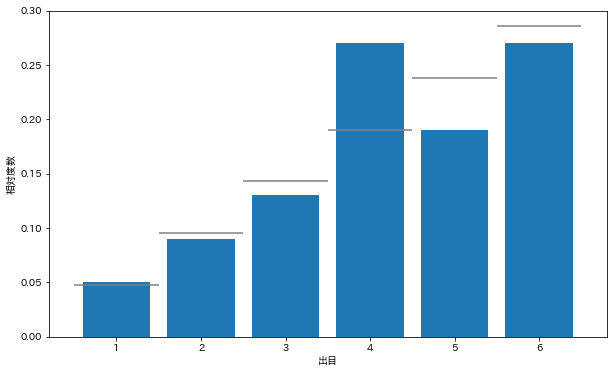

In [13]:
# Histogram を作成する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 真の確率分布を真横で表示
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 棒 Graph の[1.5, 2.5, ..., 6.5]の場所に目盛りをつける
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 目盛りの値は[1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

100回試行して得た出目の相対度数から推測される確率分布と実際の確率分布の間にはかなり差がある。
10,000回試行を行ない、その場合の Histogram を確認する

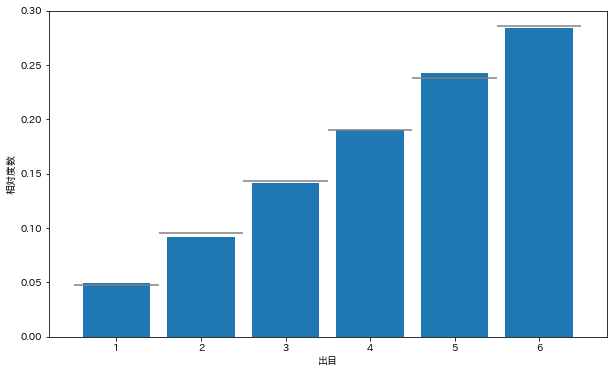

In [14]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

相対度数が実際の確率分布と近くなってきた。このまま試行回数を増やしていけば、相対度数は確率分布に収束していく。

## 推測統計における確率
- 推測統計における無作為抽出も確率 Model で記述できる。
- 無作為抽出で得る標本は母集団の確率分布に従う確率分布とみなすことができる。
- 推測統計で扱う Data はそのような確率変数の実現値と考えることができる。

全生徒の点数がどのような分布になっているか、階級幅を１点にして Histogram を図示してみる

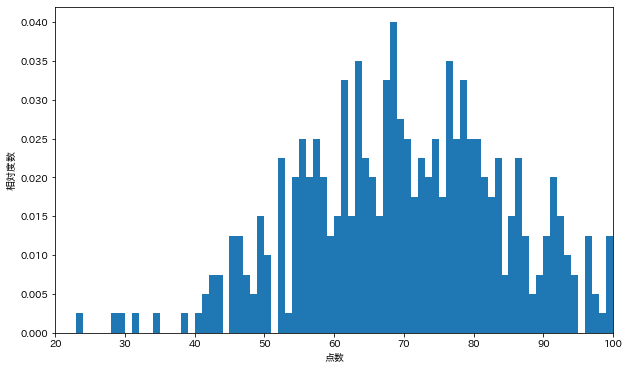

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()

69点をとった生徒は全生徒の0.04(4%)を占めていることがわかる。
このことから無作為抽出を行なうと4%の確率で69点という標本 Data を得ることになる。
「相対度数がその点を得る確率」に対応する。

上記から、この Histogram を母集団の確率分布とみなすことができる

無作為抽出とは、このような確率分布に従う確率変数の試行になる。

In [16]:
np.random.choice(scores)

89

得た実現値は、無作為抽出で得た標本 Data の値と解釈できる。

無作為抽出においても標本の Sample size を増やしていくと、標本 Data の相対度数は実際の確率分布に近づいていく。
無作為抽出(random sampling)によって Sample size 10000 の標本を抽出して、その結果を Histogram に図示してみる。

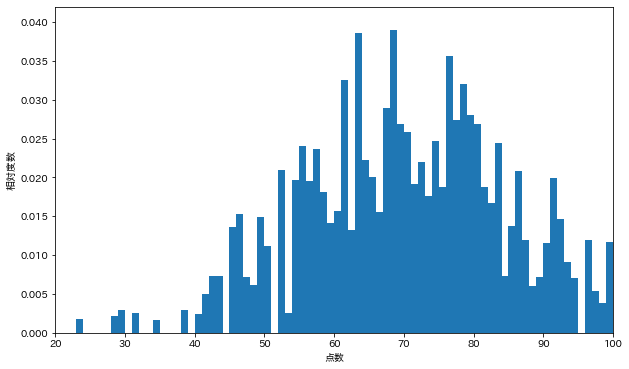

In [21]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()

Histogram は実際の分布にかなり近い形をしており、Sample size を増やしていくと実際の分布に収束していく。

#### 標本平均
標本ひとつひとつが確率変数なので、それらの平均として計算される標本平均もまた確率変数になっている
無作為抽出(random sampling)で Sample size 20 の標本を抽出して標本平均を計算する、という作業を10,000回行ない、その結果を Histogram に図示することで標本平均の分布がどのようになるか見てみる

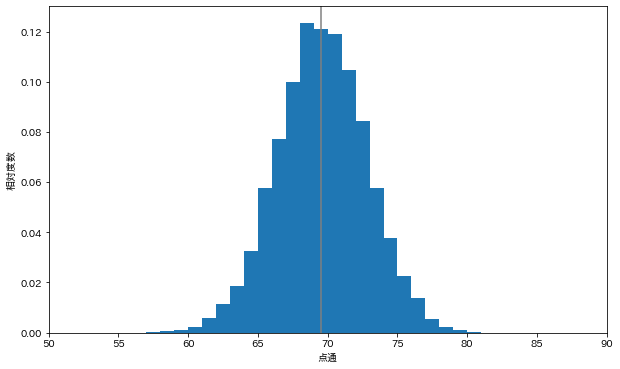

In [22]:
sample_means = [np.random.choice(sample, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 母平均を縦線で表示
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('点通')
ax.set_ylabel('相対度数')
plt.show()

中央の縦線が母平均。標本平均にばらつきこそあるが、母平均を中心に分布していることが確認できる。
これが、無作為抽出による標本平均で母平均を推測できることの根拠となっている。